<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px\" align="left">

## Interleaved Randomized Benchmarking
---

* **Last Updated:** ???
* **Requires:** qiskit-terra 0.8, qiskit-ignis 0.1.1, qiskit-aer 0.2


## Introduction

TBD

https://arxiv.org/abs/1203.4550

In [1]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

#Import Qiskit classes classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

#Import the RB Functions
#import qiskit.ignis.verification.randomized_benchmarking as rb

##DEBUG path
HOME = "/gpfs/haifa/projects/q/qq/team/shelly"
QISKIT_ROOT = HOME
import os, sys
root_dir = os.path.expanduser(QISKIT_ROOT)
sys.path = [os.path.expanduser(QISKIT_ROOT)] + sys.path
print (sys.path)
import ignis.qiskit.ignis.verification.randomized_benchmarking as rb
print(rb.__file__)

['/gpfs/haifa/projects/q/qq/team/shelly', '', '/opt/anaconda3/envs/YaelEnv/lib/python36.zip', '/opt/anaconda3/envs/YaelEnv/lib/python3.6', '/opt/anaconda3/envs/YaelEnv/lib/python3.6/lib-dynload', '/opt/anaconda3/envs/YaelEnv/lib/python3.6/site-packages', '/opt/anaconda3/envs/YaelEnv/lib/python3.6/site-packages/IPython/extensions', '/gpfs/haifa-h1/01/shelly/.ipython']
/gpfs/haifa/projects/q/qq/team/shelly/ignis/qiskit/ignis/verification/randomized_benchmarking/__init__.py


## Select the Parameters of the Interleaved RB Run

First, wee need to choose the following RB parameters:

- **nseeds:** The number of seeds. For each seed there you will get a separate list of output circuits in rb_circs.
- **length_vector:** The length vector of Clifford lengths. Must be in ascending order. RB sequences of increasing length grow on top of the previous sequences.
- **rb_pattern:** A list of the form [[i,j],[k],...] which will make simultaneous RB sequences where Qi,Qj are a 2-qubit RB sequence and Qk is a 1-qubit sequence, etc. The number of qubits is the sum of the entries. For 'regular' RB the qubit_pattern is just [[0]],[[0,1]].
- **length_multiplier:** If this is an array it scales each rb_sequence by the multiplier.
- **seed_offset:** What to start the seeds at (e.g. if we want to add more seeds later)
- **align_cliffs:**  If true adds a barrier across all qubits in rb_pattern after each set of cliffords 

As well as another parameter for interleaved RB:
- **interleaved_gates:** A list of gates of Clifford elements that will be interleaved. The length of the list would equal the length of the rb_pattern.

In this example we have 3 qubits Q0,Q1,Q2. 
We are running 2Q RB (on qubits Q0,Q2) and 1Q RB (on qubit Q1) simultaneously, 
where there are twice as many 1Q Clifford gates.

In [2]:
#Number of qubits
nQ = 3
#There are 3 qubits: Q0,Q1,Q2.
#Number of seeds (random sequences)
nseeds = 5
#Number of Cliffords in the sequence (start, stop, steps)
nCliffs = np.arange(1,200,20)
#2Q RB on Q0,Q2 and 1Q RB on Q1
rb_pattern = [[0,2],[1]]
#Do three times as many 1Q Cliffords
length_multiplier = [1,3]
#Interleaved Clifford gates (2-qubits and 1-qubit)
interleaved_gates = [['h 0', 'cx 0 1'],['y 0']]

## Generate Interleaved RB sequences

We generate RB sequences. We start with a small example (so it doesn't take too long to run).

In order to generate the RB sequences **rb_circs**, which is a list of lists of quantum circuits, 
we run the function **rb.randomized_benchmarking_seq**.

This function returns:

- **rb_original_circs:** A list of lists of circuits for the original rb sequences (separate list for each seed).
- **xdata:** The Clifford lengths (with multiplier if applicable).
- **rb_opts_dict:** Option dictionary back out with default options appended.

As well as:
- **rb_interleaved_circs**: list of lists of circuits for the interleaved rb sequences (separate list for each seed).

In [3]:
rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['length_multiplier'] = length_multiplier
rb_opts['align_cliffs'] = True
rb_opts['interleaved_gates'] = interleaved_gates
rb_original_circs, xdata, rb_interleaved_circs = rb.randomized_benchmarking_seq(**rb_opts)

As an example, we print the circuit corresponding to the first original and interleaved RB sequences:

In [4]:
#Original RB circuits
print (rb_original_circs[0][0])

         ┌───┐┌─────┐┌───┐          ┌───┐     ┌─────┐┌───┐      ░  ░ ┌───┐»
qr_0: |0>┤ H ├┤ Sdg ├┤ H ├──■───────┤ X ├─────┤ Sdg ├┤ H ├──────░──░─┤ H ├»
         └─░─┘└┬───┬┘└─░─┘  │  ┌───┐└─┬─┘┌───┐└┬───┬┘├───┤  ░   ░  ░ ├───┤»
qr_1: |0> ─░─ ─┤ X ├─ ─░─ ──┼──┤ H ├──┼──┤ H ├─┤ S ├─┤ Z ├ ─░─ ────░─┤ X ├»
         ┌───┐ └───┘   ░  ┌─┴─┐└───┘  │  └───┘┌┴───┴┐├───┤┌───┐ ░  ░ ├───┤»
qr_2: |0>┤ H ├────────────┤ X ├───────■───────┤ Sdg ├┤ H ├┤ Z ├─░──░─┤ Z ├»
         └───┘            └───┘               └─────┘└───┘└───┘ ░  ░ └───┘»
 cr_0: 0 ═════════════════════════════════════════════════════════════════»
                                                                          »
 cr_1: 0 ═════════════════════════════════════════════════════════════════»
                                                                          »
 cr_2: 0 ═════════════════════════════════════════════════════════════════»
                                                                          »
«       ┌───

In [5]:
#Interleaved RB circuits
print (rb_interleaved_circs[0][0])

         ┌───┐┌─────┐┌───┐          ┌───┐   ┌─────┐┌───┐      ░      ┌───┐     »
qr_0: |0>┤ H ├┤ Sdg ├┤ H ├──■───────┤ X ├───┤ Sdg ├┤ H ├──────░──────┤ H ├──■──»
         └─░─┘└┬───┬┘└─░─┘  │  ┌───┐└─┬─┘ ░ └┬───┬┘└─░─┘┌───┐ ░ ┌───┐├───┤  │  »
qr_1: |0> ─░─ ─┤ Y ├─ ─░─ ──┼──┤ X ├──┼───░──┤ Y ├─ ─░─ ┤ H ├───┤ H ├┤ S ├──┼──»
         ┌───┐ └───┘   ░  ┌─┴─┐└───┘  │   ░ ┌┴───┴┐┌───┐├───┤ ░ └───┘└───┘┌─┴─┐»
qr_2: |0>┤ H ├────────────┤ X ├───────■─────┤ Sdg ├┤ H ├┤ Z ├─░───────────┤ X ├»
         └───┘            └───┘             └─────┘└───┘└───┘ ░           └───┘»
 cr_0: 0 ══════════════════════════════════════════════════════════════════════»
                                                                               »
 cr_1: 0 ══════════════════════════════════════════════════════════════════════»
                                                                               »
 cr_2: 0 ══════════════════════════════════════════════════════════════════════»
                            

## Define the noise model

We define a noise model for the simulator. To simulate decay, we add depolarizing error probabilities to the CNOT and U gates.

In [6]:
noise_model = NoiseModel()
p1Q = 0.002
p2Q = 0.01
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')

We can execute the original and interleaved RB sequences either using Qiskit Aer Simulator (with some noise model) or using IBMQ provider, and obtain a list of results result_list.

In [7]:
#Original RB circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
original_result_list = []
original_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_original_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    original_result_list.append(job.result())
    original_qobj_list.append(qobj)    
print("Finished Simulating Original Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating Original Circuits


In [8]:
#Interleaved RB circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
interleaved_result_list = []
interleaved_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_original_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    interleaved_result_list.append(job.result())
    interleaved_qobj_list.append(qobj)    
print("Finished Simulating Interleaved Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating Interleaved Circuits


## Fit the results

We fit the results of the original RB circuits and the interleaved RB circuits into an exponentially decaying function and obtain the Errors per Clifford $\alpha$ and $\alpha_C$ of the original and interleaved sequences respectively.

In [9]:
#Create the original and interleaved RB fitter
original_rb_fit = rb.RBFitter(original_result_list, xdata, rb_opts['rb_pattern'])
interleaved_rb_fit = rb.RBFitter(interleaved_result_list, xdata, rb_opts['rb_pattern'])

### Calculate the interleaved gate error fidelity

From the values of $\alpha$ and $\alpha_C$ we obtain the gate error of the interleaved Clifford $c$, and $r_C=1-$average gate fidelity of the interleaved Clifford $C$, is estimated by:
$$ EPC^{est} = r_C^{est} = \frac{(2^n-1)(1-\alpha_C/\alpha)}{2^n}$$
and must lie is the range given by the systematic error bounds: 
$$[r_C^{est}-E,r_C^{est}+E]$$ 
for each of the patterns.

In [10]:
#Calculate the joint fitter
joint_rb_fit = rb.InterleavedRBFitter(original_result_list, interleaved_result_list, xdata, rb_opts['rb_pattern'])
joint_rb_fit.fit_interleaved_data()

In [11]:
joint_rb_fit.calc_interleaved_data()
joint_rb_fit.calc_interleaved_statistics()

In [12]:
#Print the joint fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit interleaved RB:', joint_rb_fit.fit_interleaved[patt_ind])

pattern: 0 - 2 qubit interleaved RB: {'alpha': 0.9745427106275082, 'alpha_err': 0.0017412217726131508, 'alpha_c': 0.9737195450012139, 'alpha_c_err': 0.0018862006450866386, 'epc_est': 0.0006335014494368574, 'epc_est_err': 0.001974791917132829, 'systematic_err': 0.037552432609300856, 'systematic_err_L': -0.036918931159864, 'systematic_err_R': 0.038185934058737714}
pattern: 1 - 1 qubit interleaved RB: {'alpha': 0.9949687653118572, 'alpha_err': 0.0008094143138916862, 'alpha_c': 0.9944414400276977, 'alpha_c_err': 0.0006367135694873025, 'epc_est': 0.0002649958986371548, 'epc_est_err': 0.0005173507726078377, 'systematic_err': 0.004766238789505661, 'systematic_err_L': -0.0045012428908685065, 'systematic_err_R': 0.005031234688142816}


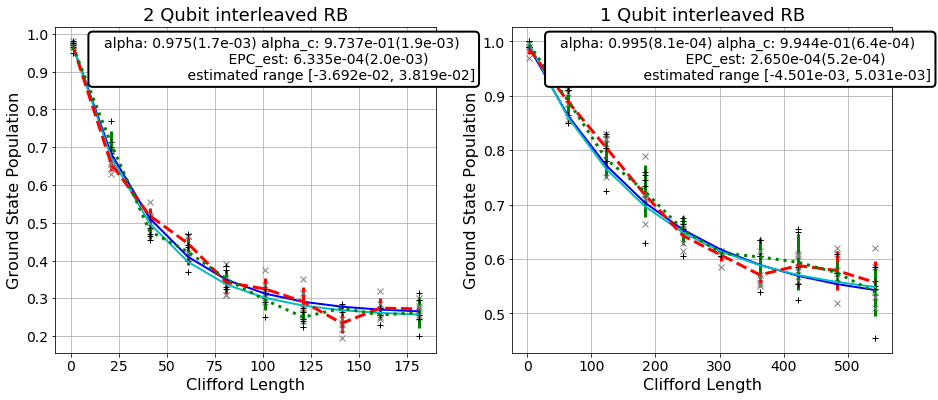

In [13]:
#Plot the joint RB data
plt.figure(figsize=(15, 6))

for i in range(2):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_rb_fit.plot_interleaved_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit interleaved RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()